<a href="https://colab.research.google.com/github/ttollefson11/IS4487/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 10

## Objectives

*   Practice fitting and evaluating classification models.
*   Practice fitting and interpreting a classification tree model specifically.

##Load Libraries

In this assignment we will be using 
- Pandas
- Scikitlearn


In [17]:
import pandas as pd
import math as ma

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the adviseinvest.csv file


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/adviseinvest.csv')

Mounted at /content/gdrive


In [4]:
#look at the top rows
df.head(10) 

answered  income  female  age  job  num_dependents  rent  own_res  new_car  \
0         1   13520       0   23    0               1     1        0      0.0   
1         0   14780       0   22    2               1     0        1      0.0   
2         1   37570       0   62    2               1     0        0      1.0   
3         0   12450       0   33    2               1     0        1      0.0   
4         0   12400       0   48    1               2     0        0      1.0   
5         1   14030       0   28    2               1     1        0      1.0   
6         1    9320       0   24    2               1     0        1      0.0   
7         1   11750       0   68    0               1     0        0      1.0   
8         1   69670       0   36    3               1     1        0      0.0   
9         1    3380       0   52    2               1     0        1      0.0   

   chk_acct  sav_acct  num_accts  mobile  product  
0         0         2          0       1        2  
1         3         0          3       0        0  
2         3         0          4       0        4  
3         1         0          2       0        0  
4         2         1          4       0        0  
5         0         0          2       0        4  
6         3         0          2       0        2  
7         1         0          0       0        3  
8         1         1          3       0        4  
9         0         2          4       0        4

In [5]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [6]:
#describe the data before cleaning it
df.describe()

answered         income        female           age           job  \
count  29504.000000   29504.000000  29504.000000  29504.000000  29504.000000   
mean       0.546638   33766.893303      0.054230     34.770065      1.915401   
std        0.497829   29379.202710      0.226475     11.355777      0.658183   
min        0.000000  -65600.000000      0.000000     19.000000      0.000000   
25%        0.000000   13550.000000      0.000000     26.000000      2.000000   
50%        1.000000   23310.000000      0.000000     32.000000      2.000000   
75%        1.000000   41690.000000      0.000000     40.000000      2.000000   
max        1.000000  159450.000000      1.000000     74.000000      3.000000   

       num_dependents          rent       own_res       new_car      chk_acct  \
count    29504.000000  29504.000000  29504.000000  29502.000000  29504.000000   
mean         1.140998      0.210412      0.681128      0.240797      1.468547   
std          0.348025      0.407608      0.466047      0.427575      1.234727   
min          1.000000      0.000000      0.000000      0.000000      0.000000   
25%          1.000000      0.000000      0.000000      0.000000      0.000000   
50%          1.000000      0.000000      1.000000      0.000000      1.000000   
75%          1.000000      0.000000      1.000000      0.000000      3.000000   
max          2.000000      1.000000      1.000000      1.000000      3.000000   

           sav_acct     num_accts        mobile       product  
count  29504.000000  29504.000000  29504.000000  29504.000000  
mean       0.956616      2.458175      0.091106      1.535792  
std        1.483946     19.497353      0.287765      1.625916  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      2.000000      0.000000      0.000000  
50%        0.000000      2.000000      0.000000      1.000000  
75%        2.000000      3.000000      0.000000      3.000000  
max        4.000000   3345.000000      1.000000      4.000000

## Clean and Standardize the data

- Remove rows with NAs.  
- Remove the row with the single outlier in num_accts. 
- Remove the rows with negative income values. 
- Remove the product variable.
- Make all the categorical variables into factors.


In [7]:
#Remove rows with NAs
df_clean = df.dropna()

#Remove the row with the single outlier in num_accts
df_clean = df_clean[(df_clean['num_accts'] < 20)]

#Remove the rows with negative income values
df_clean = df_clean[(df_clean['income'] >= 0)]

#Remove the product variable
df_clean = df_clean.drop(columns = ['product'])

#Make all the categorical variables into factors
df_clean['answered'] = df_clean['answered'].astype('category')
df_clean['female'] = df_clean['female'].astype('category')
df_clean['job'] = df_clean['job'].astype('category')
df_clean['num_dependents'] = df_clean['num_dependents'].astype('category')
df_clean['rent'] = df_clean['rent'].astype('category')
df_clean['own_res'] = df_clean['own_res'].astype('category')
df_clean['new_car'] = df_clean['new_car'].astype('category')
df_clean['chk_acct'] = df_clean['chk_acct'].astype('category')
df_clean['sav_acct'] = df_clean['sav_acct'].astype('category')
df_clean['num_accts'] = df_clean['num_accts'].astype('category')
df_clean['mobile'] = df_clean['mobile'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29499 entries, 0 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29499 non-null  category
 1   income          29499 non-null  int64   
 2   female          29499 non-null  category
 3   age             29499 non-null  int64   
 4   job             29499 non-null  category
 5   num_dependents  29499 non-null  category
 6   rent            29499 non-null  category
 7   own_res         29499 non-null  category
 8   new_car         29499 non-null  category
 9   chk_acct        29499 non-null  category
 10  sav_acct        29499 non-null  category
 11  num_accts       29499 non-null  category
 12  mobile          29499 non-null  category
dtypes: category(11), int64(2)
memory usage: 1009.9 KB


## Data Modeling

The target variable for this modeling exercise is ANSWERED.  

In this dataset answered calls are the majority class.  A simple classification model would be to always predict the majority class.  We'll call this the majority class classifier.  Always predicting the majority class will ensure that predictions are correct for a majority of cases.  

Our tree models should have better accuracy than the majority class classifier, which we will therefore use as a benchmark for evaluating these more complicated models. 

The proportion of answered calls in this dataset is equivalent to the accuracy of the majority class classifier.

What is the accuracy of the majority class classifier in this case?

Round your answer to three decimals.

In [12]:
#Add new field with binary value for leave  
df_clean['answered_flag'] = df_clean['answered'].replace('0','0')  
df_clean['answered_flag'] = df_clean['answered_flag'].replace('1','1')

#Convert to integer
df_clean['answered_flag'] = df_clean['answered_flag'].astype('int')

#Find the mean value
df_clean['answered_flag'].mean()

0.5465947998237228

Fit a tree model to the outcome using just one variable, income. We'll call this the "income model." What is the accuracy of the income model?

Round your answer to three decimals.

In [14]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income']]
y = df_clean['answered']

income_model = DecisionTreeClassifier()

# Create Decision Tree Classifer
income_model = income_model.fit(x,y)

Check the accuracy

In [15]:
pred = income_model.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.9934913047899929


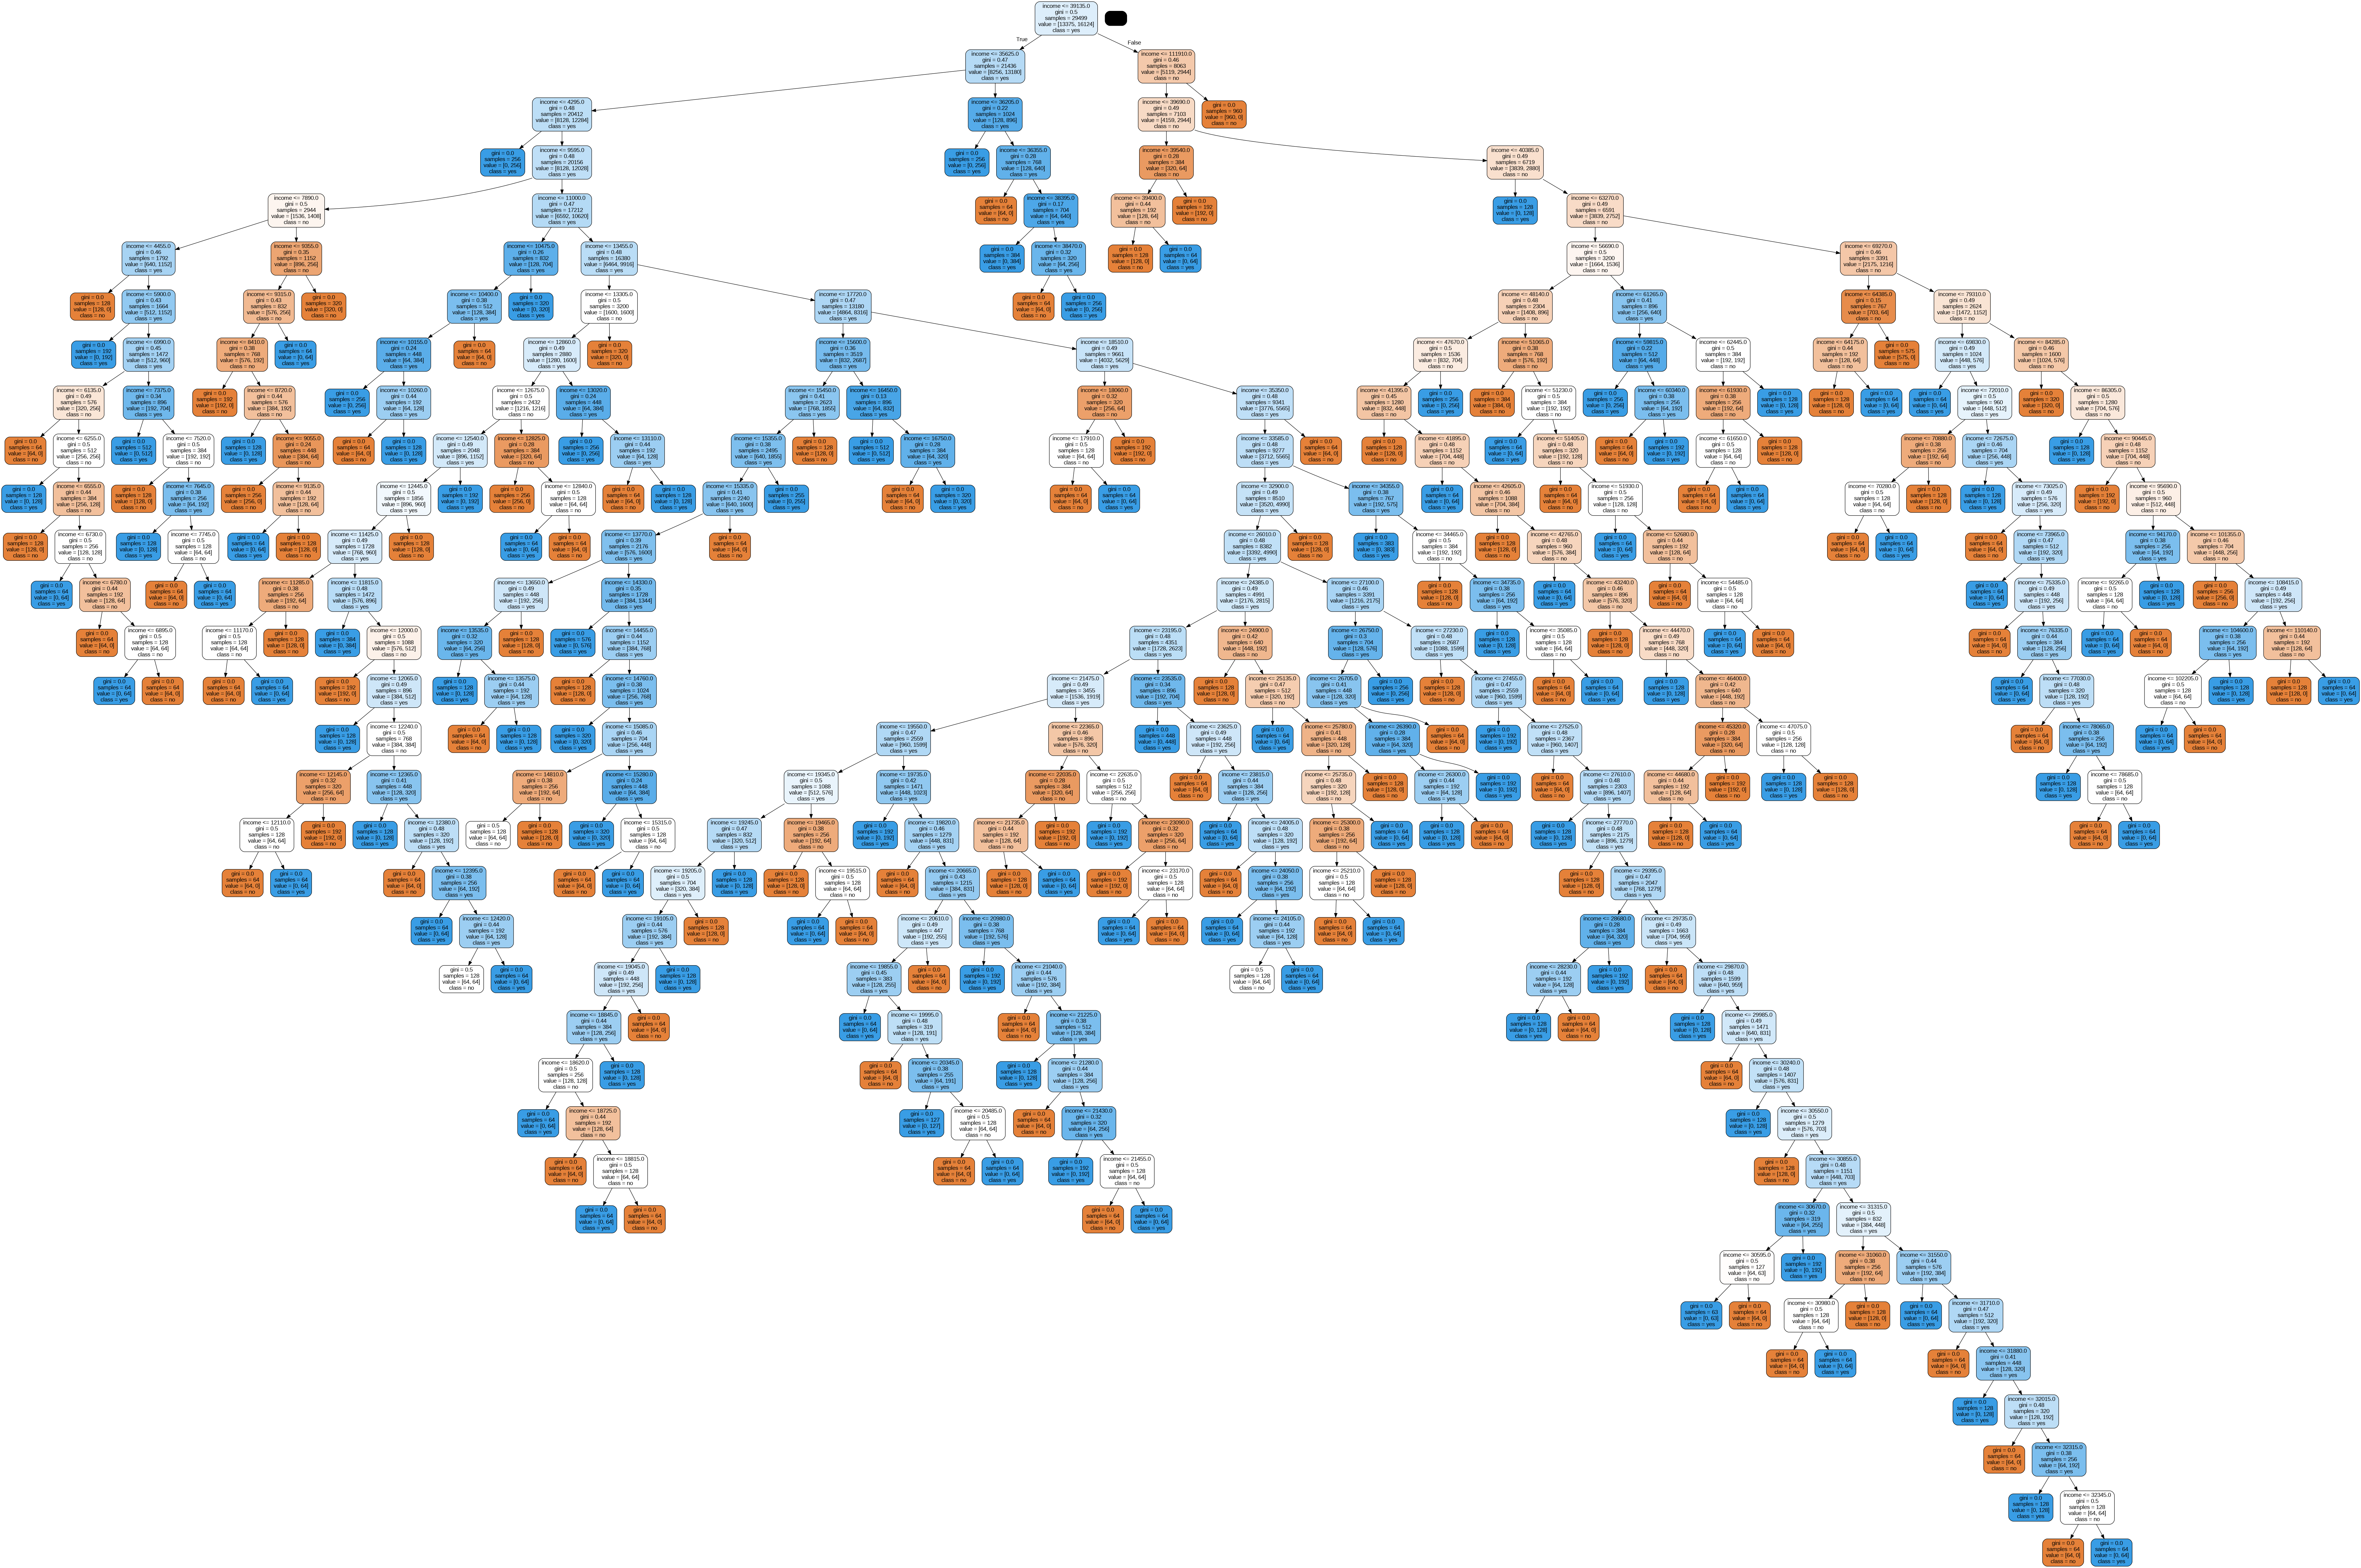

In [16]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(income_model, out_file=dot_data, 
                   feature_names=x.columns,class_names=['no','yes'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The first split in this tree, on income >= 39135, is guaranteed by the tree algorithm to yield the greatest information gain (IG) of any possible split. What is the IG associated with that split?

The formula for IG combines the weighted entropy in the children (weighted by the proportion of the data in each node) and subtracts it from the entropy in the parent. Here is what you need to calculate:

entropy(parent): entropy in the parent, prior to the split. Hint:  This is node 1).
entropy(c1): entropy in the first child.
p(c1): the proportion of observations from the parent that wind up in the first child after the split.
entropy(c2): entropy in the second child.
p(c2): the proportion of observations from the parent that wind up in the second child after the split.
The formula is: IG = entropy(parent) - [p(c1) * entropy(c1) + p(c2) * entropy(c2)]

Recall that entropy for any group is defined as: p1 * log2(p1) - p2 * log2(p2), where p1 is the proportion of the first label and p2 is the proportion of the second label.

The easiest way to do this calculation is to define as objects each of the elements in the above formula.

This is a situation where rounding the inputs when calculating IG will throw off your answer due to rounding error.  For this reason make sure to include at least 3 decimal places for all the quantities included in your calculation.

Report your answer to three decimal places.

In [21]:
entropy_parent = -(13375/29499)*ma.log(13375/29499) - (16124/29499)*ma.log(16124/29499)

entropy_child1 = -(8256/21436)*ma.log(8256/21436) - (1024/21436)*ma.log(1024/21436)

entropy_child2 = -(5119/8063)*ma.log(5119/8063) - (2944/8063)*ma.log(2944/8063)

ig = entropy_parent - ((21436/29499)*entropy_child1 + (8063/29499)*entropy_child2)

print(ig)

0.13679749818834852
